# Programando el método de Runge-Kutta

## Breve introducción al método

### ¿Útil para qué?

Este método sirve para aproximar la solución del problema de valor inicial (i.e una ecuación diferencial con valor incial) del tipo

> 
\begin{equation}
y'=f(t,y)\quad t\in[a,b]\quad y(a)=\alpha
\end{equation}

### ¿Cómo funciona?

* **INPUTS** $a,b$ los extremos del intervalo; $N$ cantidad de puntos en el intervalo; condición inicial $\alpha$
* **OUTPUT** Aproximación $w$ de la función $y$ en cada uno de los $N+1$ puntos del intervalo $[a,b]$.

> **PASO 2**: Para $i=1,\dots, N$ hacer Pasos 3-5
>> **PASO 3**: 
\begin{split}
\text{Definir}\quad &K_1=hf(t,w)\\
&K_2= hf\left(t+h/2, w+K_1/2\right)\\
&K_3= hf\left(t+h/2, w+K_2/2\right)\\
&K_4= hf\left(t+h/2, w+K_3\right)
\end{split}
>> **PASO 4**
\begin{split}
\text{Definir}\quad &w=w+\frac{K_1+2K_2+2K_3+K_4}{6} \quad\text{(se calcular $w_i$})\\
&t=a+ih\quad\text{(se calcula $t_i$})
\end{split}

> **PASO 5** Parar

**NOTA:** Este algoritmo se ha obtenido de [Numerical Analysis 9nth ed. pp 288-289](https://faculty.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf)

## Programación

Añadimos las librerías necesarias

In [1]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")

Programamos el algortimo descrito arriba

In [2]:
def RK4(f,a,b,alpha,N):
    '''
    Runge-Kutta order four method to approximate the solution of an
    ordinary differential equation with an initial condition
    
    INPUTS:
    
    f(function)  : The function that defines the ordinary differential equation
    a(float)     : left extreme of the solution domain [a,b]
    b(float)     : right extreme of the solution domain [a,b]
    alpha(float) : initial condition y(a)=alpha
    N(integer)   : 
    
    OUTPUT:
    
    w(onedarray) : approximation of function y at N equally spaced point of [a,b]
    '''
    h=(b-a)/N
    t=np.zeros(N+1)
    w=np.zeros(N+1)
    w[0]=alpha
    for i in range(0,N):
        t[i]=a+i*h
        K1=h*f(t[i],w[i])
        K2= h*f(t[i]+h/2, w[i]+K1/2)
        K3= h*f(t[i]+h/2, w[i]+K2/2)
        K4= h*f(t[i]+h/2, w[i]+K3)
        w[i+1]=w[i]+(K1+2*K2+2*K3+K4)/6
    t[N]=b
    return t,w 

Probando si el algoritmo resuelve la EDO siguiente:
    $$
    y'=y\quad y(0)=1
    $$
   la cual, si se resulve analíticamente, tiene por solución $y(t)=\exp(t)$

In [3]:
def f(t,y):
    return y

In [4]:
sol=RK4(f,0,1,1,100)
print(sol)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]), array([1.        , 1.01005017, 1.02020134, 1.03045453, 1.04081077,
       1.0512711 , 1.06183655, 1.07250818, 1.08328707, 1.09417428,
       1.10517092, 1.11627807, 1.12749685, 1.13882838, 1.1502738 ,
       1.16183424, 1.17351087, 1.18530485, 1.19721736, 1.2092496 ,
       1.22140276, 1.23367806, 1.24607673, 1.25860001

Podemos hacer una comparación gráfica entre la solución numérica y la solución analítica como sigue:

Text(0.5, 1.0, 'Exact Solution ')

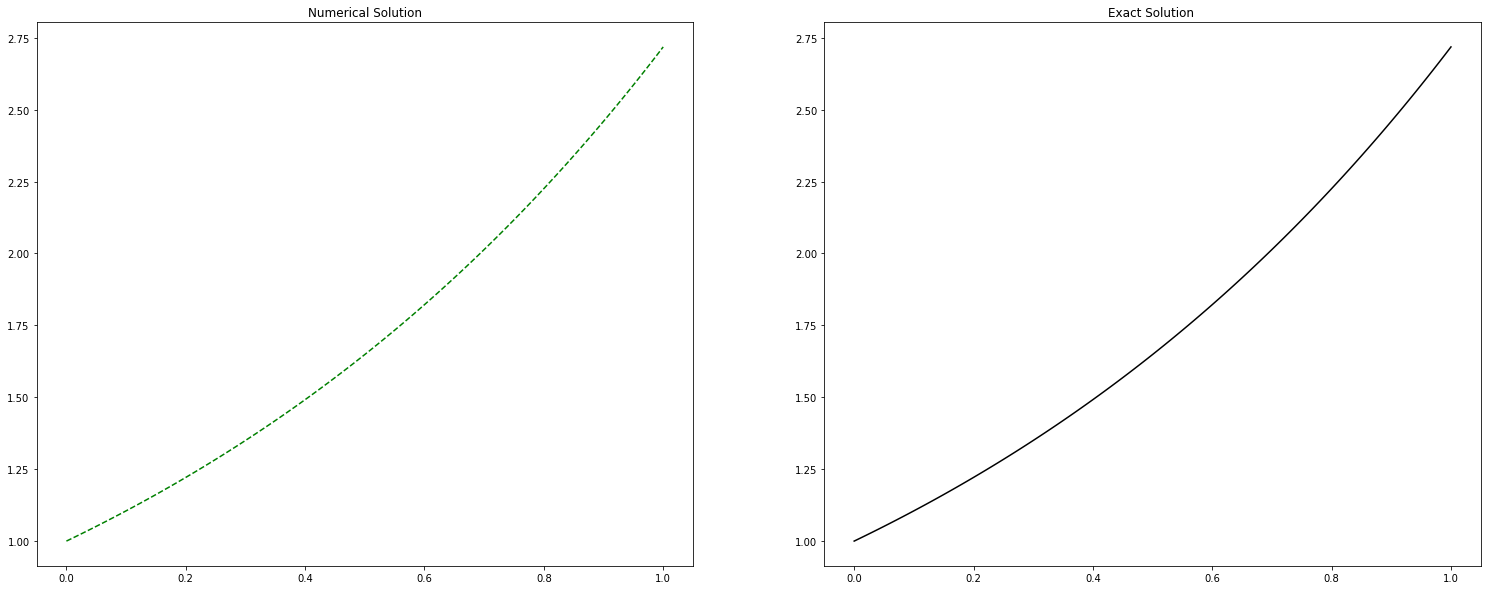

In [5]:
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
t=sol[0]
w=sol[1]
y=np.exp(t)
fig = plt.figure(figsize=(40,10))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='green')
#ax.legend(loc='best')
plt.title('Numerical Solution')

ax = fig.add_subplot(1,3,2)
plt.plot(t,y,color='black')
plt.title('Exact Solution ')

y podemos calcular el error relativo entre la solución analítica y numérica en cada punto

In [6]:
# la siguiente función auxiliar ha sido extraida de las notas
from numpy import linalg as LA

def compute_error(obj,approx):
    '''
    Relative or absolute error between obj and approx.
    '''
    if LA.norm(obj) > np.nextafter(0,1):
        Err = LA.norm(obj-approx)/LA.norm(obj)
    else:
        Err = LA.norm(obj-approx)
    return Err

y vemos que la solución numérica es muy similar a la analítica, calculando el error relativo

In [7]:
compute_error(w,y)

5.872723347674721e-11

# Graficando el solido de revolución

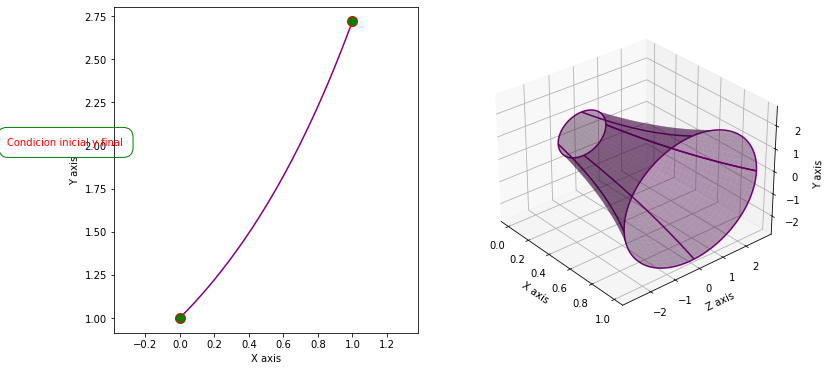

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#extremos del intervalo
a,b =0,1

#initial conditions
xa,xb= 1, math.exp(1)

#dominio de la funcion
t=sol[0]

#funcion solucion evaluada en cada t
y_t=sol[1]

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(t,y_t,'purple')
ax1.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="green", label='condicion final e inicial') #graficando condicion inicial y final

ax1.text(-1, 2, 'Condicion inicial y final', color='red', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round,pad=1'))

#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=4,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
ax1.axis('equal')
plt.show()